In [1]:
# importing data from LOTOS site
import seaborn as sns
import pandas as pd
data95 = pd.read_html('https://www.lotos.pl/145/type,oil_95/dla_biznesu/hurtowe_ceny_paliw/archiwum_cen_paliw')[0]
data95.drop(['Akcyza','Opłata paliwowa'],axis=1,inplace=True)
data98 = pd.read_html('https://www.lotos.pl/145/type,oil_98/dla_biznesu/hurtowe_ceny_paliw/archiwum_cen_paliw')[0]
data98.drop(['Akcyza','Opłata paliwowa'],axis=1,inplace=True)
dataon = pd.read_html('https://www.lotos.pl/145/type,oil_eurodiesel/dla_biznesu/hurtowe_ceny_paliw/archiwum_cen_paliw')[0]
dataon.drop(['Akcyza','Opłata paliwowa'],axis=1,inplace=True)
data=data95.merge(data98,on='Data zmiany',how='left',suffixes=(' 95',' 98')).merge(dataon,on='Data zmiany',how='left')
data.columns=['Data zmiany','Cena_95','Cena_98','Cena_ON']
data.head()

,Data zmiany,Cena_95,Cena_98,Cena_ON
0,2022-05-07,"6 520,00","6 942,00","6 753,00"
1,2022-05-06,"6 350,00","6 747,00","6 875,00"
2,2022-05-05,"6 343,00","6 733,00","6 831,00"
3,2022-05-01,"6 236,00","6 612,00","6 901,00"
4,2022-04-30,"6 236,00","6 612,00","6 987,00"


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4441 entries, 0 to 4440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data zmiany  4441 non-null   object
 1   Cena_95      4441 non-null   object
 2   Cena_98      4441 non-null   object
 3   Cena_ON      4441 non-null   object
dtypes: object(4)
memory usage: 173.5+ KB


In [3]:
# Cleaning data and change dtypes 
data=data.query('(Cena_95 !="000") | (Cena_98 !="000") | (Cena_ON !="000")')
cols=['Cena_95','Cena_98','Cena_ON']
data[cols] = data[cols].apply(lambda x: x.str.replace(',00',''))
data[cols]=data[cols].apply(lambda x:x.str.replace(' ',''))
data[cols]=data[cols].astype('int64')
data[cols]=data[cols].apply(lambda x: x/1000)
data.head()
data['Data zmiany']=pd.to_datetime(data['Data zmiany'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4441 entries, 0 to 4440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data zmiany  4441 non-null   datetime64[ns]
 1   Cena_95      4441 non-null   float64       
 2   Cena_98      4441 non-null   float64       
 3   Cena_ON      4441 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 173.5 KB


In [4]:
# filling missing dates with previous values
idx = pd.date_range("2005-02-24",end='2022-05-07', freq="D")
idx=pd.DataFrame(idx,dtype='datetime64[ns]',columns=['Data zmiany'])
c_data=idx.merge(data,on='Data zmiany',how='left').fillna(method='ffill')
c_data.set_index('Data zmiany',inplace=True)
c_data.head()

,Cena_95,Cena_98,Cena_ON
Data zmiany,,,
2005-02-24,2.745,2.81,2.536
2005-02-25,2.745,2.81,2.536
2005-02-26,2.745,2.81,2.556
2005-02-27,2.745,2.81,2.556
2005-02-28,2.745,2.81,2.556


c:\Users\Adam\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
c:\Users\Adam\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
c:\Users\Adam\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
C:\Users\Adam\AppData\Local\Temp\ipykernel_2124\4147640050.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


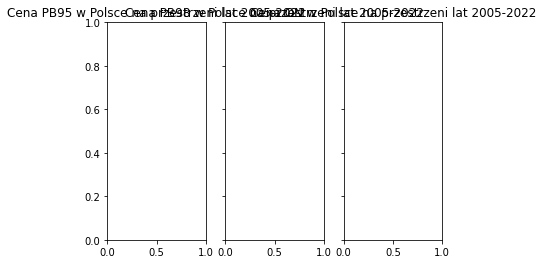

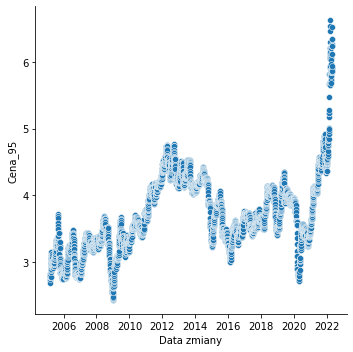

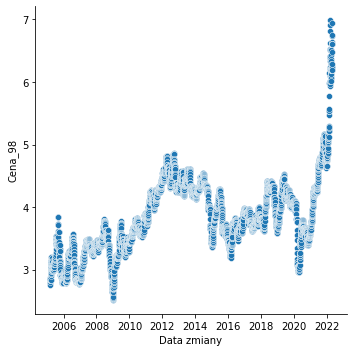

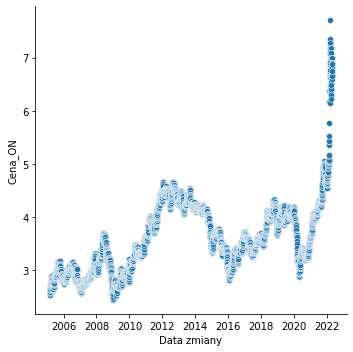

In [5]:
# # visualize existing trend
import seaborn as sns
import matplotlib.pyplot as plt
fig,(ax0,ax1,ax2)=plt.subplots(1,3,sharey=True,sharex=True)
sns.relplot(x=c_data.index,y='Cena_95',data=c_data,kind='scatter',ax=ax0)
ax0.set_title('Cena PB95 w Polsce na przestrzeni lat 2005-2022')
sns.relplot(x=c_data.index,y='Cena_98',data=c_data,kind='scatter',ax=ax1)
ax1.set_title('Cena PB98 w Polsce na przestrzeni lat 2005-2022')
sns.relplot(x=c_data.index,y='Cena_ON',data=c_data,kind='scatter',ax=ax2)
ax2.set(title='Cena ON w Polsce na przestrzeni lat 2005-2022')
fig.show()

In [6]:
## some statistical backgroud
data2022=c_data.loc['2022-01-01':'2022-05-07']
def cena_dane(typ):
    '''typ=95,98 lub ON'''
    data_mean=round(data2022['Cena_'+str(typ)].mean(),3)
    data_min=data2022['Cena_'+str(typ)].min()
    data_max=data2022['Cena_'+str(typ)].max()
    print(f"Średnia hurtowa cena paliwa {typ} w roku 2022 wyniosła: "+str(data_mean)+' zł')
    print(f"Najniższa hurtowa cena paliwa {typ} w  roku 2022 wyniosła: "+str(data_min)+' zł')
    print(f"Najwyższa hurtowa cena paliwa {typ} w roku 2022 wyniosła: "+str(data_max)+' zł\n')
cena_dane(95)
cena_dane(98)
cena_dane('ON')

Średnia hurtowa cena paliwa 95 w roku 2022 wyniosła: 5.411 zł
Najniższa hurtowa cena paliwa 95 w  roku 2022 wyniosła: 4.475 zł
Najwyższa hurtowa cena paliwa 95 w roku 2022 wyniosła: 6.624 zł

Średnia hurtowa cena paliwa 98 w roku 2022 wyniosła: 5.72 zł
Najniższa hurtowa cena paliwa 98 w  roku 2022 wyniosła: 4.758 zł
Najwyższa hurtowa cena paliwa 98 w roku 2022 wyniosła: 6.986 zł

Średnia hurtowa cena paliwa ON w roku 2022 wyniosła: 5.873 zł
Najniższa hurtowa cena paliwa ON w  roku 2022 wyniosła: 4.617 zł
Najwyższa hurtowa cena paliwa ON w roku 2022 wyniosła: 7.699 zł

